# Chapter 12 - iPython Sessions

## TextBlob

### Create a TextBlob

In [1]:
from textblob import TextBlob

In [2]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather.'

In [3]:
blob = TextBlob(text)

In [4]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

#### Self Check

In [5]:
exercise_blob = TextBlob('This is a TextBlob')

In [6]:
exercise_blob

TextBlob("This is a TextBlob")

### Tokenizing Text into Sentences and Words

In [7]:
blob.sentences

[Sentence("Today is a beautiful day."),
 Sentence("Tomorrow looks like bad weather.")]

In [8]:
# get list of tokens
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather'])

#### Self Check

In [9]:
text2 = TextBlob('This is the first sentence. The second sentence is this one here.')

In [10]:
text2.sentences

[Sentence("This is the first sentence."),
 Sentence("The second sentence is this one here.")]

In [11]:
text2.word_counts

defaultdict(int,
            {'this': 2,
             'is': 2,
             'the': 2,
             'first': 1,
             'sentence': 2,
             'second': 1,
             'one': 1,
             'here': 1})

### Parts of Speech Tagging

In [12]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [13]:
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

#### Self Check

In [14]:
# create TextBlob and get the parts of speech (POS)
TextBlob('My dog is cute').tags

[('My', 'PRP$'), ('dog', 'NN'), ('is', 'VBZ'), ('cute', 'JJ')]

### Extracting Noun Phrases

In [15]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [16]:
blob.noun_phrases

WordList(['beautiful day', 'tomorrow', 'bad weather'])

#### Self Check

In [17]:
# create text blob and show the noun phrases
TextBlob('The red brick factory is for sale').noun_phrases

WordList(['red brick factory'])

### Sentiment Analysis with TextBlob's Default Sentiment Analyser

In [18]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [19]:
# get the sentiment property
blob.sentiment

# polarity indicates the sentiment and varies from -1 to 1 being 0 neutral
# the subjectivity of the text varies from 0 to 1 being 1 the most subjective

Sentiment(polarity=0.07500000000000007, subjectivity=0.8333333333333333)

In [20]:
# getting the polarity and subjectivity from the Sentiment object
%precision 3
blob.sentiment.polarity

0.075

In [21]:
blob.sentiment.subjectivity

0.833

In [22]:
# getting the sentiment of a Sentence
for sentence in blob.sentences:
    print(sentence.sentiment)
# it might explain why the whole text is neutral. First sentence is 0.85 and the second -0.70

Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


#### Self Check

In [23]:
# create 3 sentences and analyse their sentiment
from textblob import Sentence

In [24]:
Sentence('The movie is not good.').sentiment

Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)

In [25]:
Sentence("The movie was not bad.").sentiment

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [26]:
Sentence('The movie was excellent!').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

### Sentiment Analysis with the NaiveBayesAnalyzer

In [27]:
from textblob.sentiments import NaiveBayesAnalyzer

In [28]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())

In [29]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [30]:
# analyse overal sentiment sentiment
blob.sentiment

Sentiment(classification='neg', p_pos=0.47662917962091056, p_neg=0.5233708203790892)

In [31]:
# analyse each sentence sentiment
for idx, sentence in enumerate(blob.sentences):
    print(f'Sentence {idx+1}: {sentence.sentiment}')

Sentence 1: Sentiment(classification='pos', p_pos=0.8117563121751951, p_neg=0.18824368782480477)
Sentence 2: Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


#### Self Check

In [32]:
# create a phrase and analyse its sentiment using the NaiveBayesAnalyser
phrase = 'The movie was excellent!'

In [33]:
ex_blob = TextBlob(phrase, analyzer=NaiveBayesAnalyzer())

In [34]:
ex_blob.sentiment

Sentiment(classification='pos', p_pos=0.7318278242290406, p_neg=0.26817217577095936)

### Language Detection and Translation

In [35]:
blob

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [36]:
# detect language
blob.detect_language()

'en'

In [37]:
# get translation to Spanish
spanish = blob.translate(to='es')
spanish

TextBlob("Hoy es un hermoso dia. Mañana parece mal tiempo.")

In [38]:
spanish.detect_language()

'es'

In [39]:
# translate to simplified chinese
chinese = blob.translate(to='zh')
chinese

TextBlob("今天是美好的一天。明天看起来天气不好。")

In [40]:
chinese.detect_language()

'zh-CN'

In [41]:
# calling translate withou arguments translate the detected language to english
spanish.translate()

TextBlob("Today is a beautiful day. Tomorrow looks like bad weather.")

In [42]:
chinese.translate()

TextBlob("Today is a beautiful day. The weather looks bad tomorrow.")

#### Self Check

In [43]:
# translate a phrase into French then detect the language
ex_blob = TextBlob('Today is a beautiful day').translate(to='fr')
ex_blob

TextBlob("Aujourd'hui est un beau jour")

In [44]:
ex_blob.detect_language()

'fr'

### Inflection: Pluralization and Singularization

In [45]:
from textblob import Word

In [46]:
index = Word('index')

In [47]:
index.pluralize()

'indices'

In [48]:
cacti = Word('cacti')

In [49]:
cacti.singularize()

'cactus'

In [50]:
animals = TextBlob('dog cat fish bird').words

In [51]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

#### Self Check

In [52]:
# pluralize focus and singularize children
children = Word('children')
focus = Word('focus')

In [53]:
children.singularize()

'child'

In [54]:
focus.pluralize()

'foci'

### Spell Checking and Correction

In [55]:
word = Word('theyr')
%precision 2

'%.2f'

In [56]:
word.spellcheck() # returns a list of tuples  possible correct spellings and a confidence value

[('they', 0.57), ('their', 0.43)]

In [57]:
# correct the word 
word.correct() # chooses the word with the highest confidence value

'they'

In [58]:
# correct a sentence
sentence = TextBlob('Ths sentense has missplled wrds.')
sentence

TextBlob("Ths sentense has missplled wrds.")

In [59]:
sentence.correct()

TextBlob("The sentence has misspelled words.")

#### Self Check

In [60]:
# correct the spelling
sentence = TextBlob('I canot beleive I misspeled thees werds')
sentence

TextBlob("I canot beleive I misspeled thees werds")

In [61]:
sentence.correct()

TextBlob("I cannot believe I misspelled these words")

### Normalisation: Stemming and Lemmatisation

In [62]:
word2 = Word('varieties')

In [63]:
word2.stem()

'varieti'

In [64]:
word2.lemmatize()

'variety'

#### Self Check

In [65]:
word3 = Word('strawberries')

In [66]:
word3.stem()

'strawberri'

In [67]:
word3.lemmatize()

'strawberry'

### Word Frequencies

In [83]:
from pathlib import Path # opens and closes the file after loading

In [84]:
rj_blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [85]:
type(rj_blob.word_counts) # defaultdictionary

collections.defaultdict

In [86]:
rj_blob.word_counts['romeo']

315

In [87]:
# count words via count method
rj_blob.words.count('juliet')

190

In [88]:
# count noun phrases
rj_blob.noun_phrases.count('lady capulet')

46

#### Self Check

In [89]:
# count the number of stopwords 'a', 'the' and 'an'
rj_blob.words.count('a')

483

In [90]:
rj_blob.words.count('the')

688

In [91]:
rj_blob.words.count('an')

71

### Getting Definitions, Synonyms and Anotnyms form WordNet

In [92]:
happy = Word('happy')

In [93]:
#get definitions
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [95]:
# get synonyms
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [96]:
synonyms = set()

In [99]:
for synset in happy.synsets:
    for lemma in synset.lemmas():
        print(lemma)
        synonyms.add(lemma.name())

Lemma('happy.a.01.happy')
Lemma('felicitous.s.02.felicitous')
Lemma('felicitous.s.02.happy')
Lemma('glad.s.02.glad')
Lemma('glad.s.02.happy')
Lemma('happy.s.04.happy')
Lemma('happy.s.04.well-chosen')


In [98]:
synonyms

{'felicitous', 'glad', 'happy', 'well-chosen'}

In [100]:
# getting antonyms
lemmas = happy.synsets[0].lemmas()
lemmas

[Lemma('happy.a.01.happy')]

In [102]:
lemmas[0].antonyms()

[Lemma('unhappy.a.01.unhappy')]

#### Self Check

In [103]:
# Display the synsets and definitions for the word 'boat'
boat = Word('boat')

In [104]:
boat.synsets

[Synset('boat.n.01'), Synset('gravy_boat.n.01'), Synset('boat.v.01')]

In [105]:
boat.definitions

['a small vessel for travel on water',
 'a dish (often boat-shaped) for serving gravy or sauce',
 'ride in a boat on water']

### Deleting StopWords

In [106]:
import nltk

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krustybr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
from nltk.corpus import stopwords

In [110]:
stops = stopwords.words('english')

In [111]:
blob = TextBlob('Today is a beautiful day.')

In [112]:
# remove stopwrods using list comprehension
[word for word in blob.words if word not in stops]

['Today', 'beautiful', 'day']

#### Self Check

In [113]:
ex_blob = TextBlob('TextBlob is easy to use.')

In [114]:
[word for word in ex_blob.words if word not in stops]

['TextBlob', 'easy', 'use']

### n-grams

In [117]:
text = 'Today is a beautiful day. Tomorrow looks like bad weather'

In [118]:
blob = TextBlob(text)

In [119]:
# create n-grams - trigrams
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'Tomorrow']),
 WordList(['day', 'Tomorrow', 'looks']),
 WordList(['Tomorrow', 'looks', 'like']),
 WordList(['looks', 'like', 'bad']),
 WordList(['like', 'bad', 'weather'])]

In [120]:
# create n-grams of five words:
blob.ngrams(n=5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'Tomorrow']),
 WordList(['a', 'beautiful', 'day', 'Tomorrow', 'looks']),
 WordList(['beautiful', 'day', 'Tomorrow', 'looks', 'like']),
 WordList(['day', 'Tomorrow', 'looks', 'like', 'bad']),
 WordList(['Tomorrow', 'looks', 'like', 'bad', 'weather'])]

#### Self Check

In [121]:
blob = TextBlob('TextBlob is easy to use.')

In [123]:
blob.ngrams()

[WordList(['TextBlob', 'is', 'easy']),
 WordList(['is', 'easy', 'to']),
 WordList(['easy', 'to', 'use'])]

## Visualisation

### Visualising with Pandas

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
# Loading the data
blob = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [129]:
stop_words = stopwords.words('english')

In [130]:
# Getting the Word Frequencies
items = blob.word_counts.items()

In [132]:
# Eliminate Stop Words
items = [item for item in items if item[0] not in stop_words]

In [134]:
# Sorting the Words by Frequency
from operator import itemgetter

In [135]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [137]:
top20 = sorted_items[1:21]

In [139]:
top20

[('romeo', 315),
 ('thou', 278),
 ('juliet', 190),
 ('thy', 170),
 ('capulet', 163),
 ('nurse', 149),
 ('love', 148),
 ('thee', 138),
 ('lady', 117),
 ('shall', 110),
 ('friar', 105),
 ('come', 94),
 ('mercutio', 88),
 ('lawrence', 82),
 ('good', 80),
 ('benvolio', 79),
 ('tybalt', 79),
 ('enter', 75),
 ('go', 75),
 ('night', 73)]

In [140]:
# Convert top20 to pandas DataFrame
df = pd.DataFrame(top20, columns=['word', 'count'])

In [141]:
df

,word,count
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


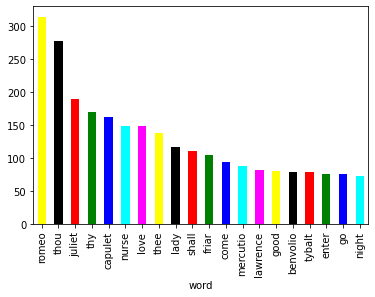

In [150]:
# Visualising the DataFrame
colors = ['yellow', 'black', 'red', 'green', 'blue', 'cyan', 'magenta']
axes = (df.plot.bar(x='word', y='count', legend=False, color=colors))

### Visualising Word Frequencies with Word Clouds

In [152]:
# Loading the Mask Image that Specifies the Word Cloud's Shape
import imageio

In [154]:
mask_image = imageio.imread('mask_heart.png')

In [155]:
# Configuring the Word Cloud Object
from wordcloud import WordCloud

In [156]:
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

In [158]:
romeo_juliet = Path('RomeoAndJuliet.txt').read_text()
wordcloud = wordcloud.generate(romeo_juliet)

In [160]:
wordcloud.to_file('RomeoAndJulietHeart.png')

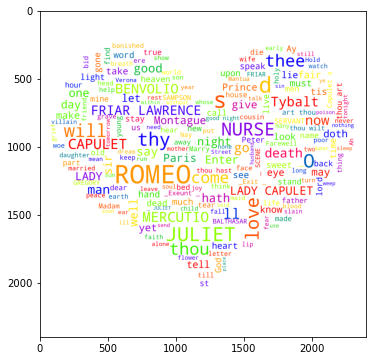

In [163]:
# Displaying Image with Matplotlib
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.imshow(wordcloud)

#### Self Check


In [165]:
# Create a star shaped wordcloud
mask_image2 = imageio.imread('mask_star.png')

In [232]:
wordcloud2 = WordCloud(width=300, height=300, colormap='prism', mask=mask_image2, 
                       background_color='white')

In [233]:
# create a TextBlob for the book
romeo_juliet = TextBlob(Path('RomeoAndJuliet.txt').read_text())

In [234]:
# get a list of tuples with the word count
items = romeo_juliet.word_counts.items();

In [235]:
# remove stop words
items = [item for item in items if item[0] not in stop_words]

In [236]:
# generate wordcloud using fit_words
wordcloud2.fit_words(dict(items))

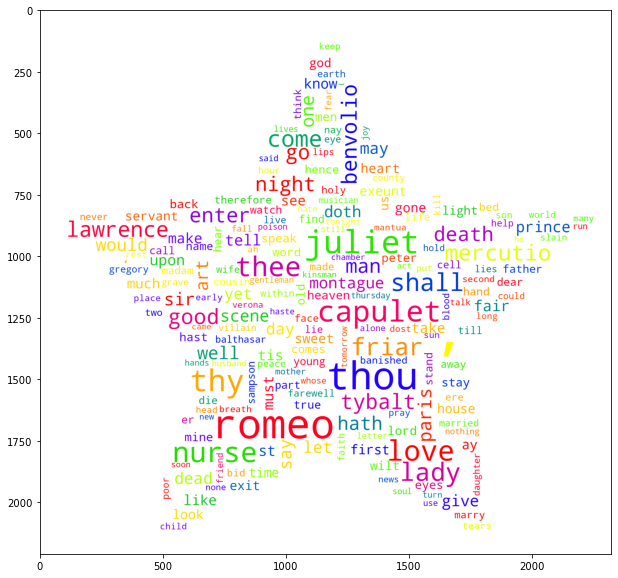

In [237]:
# plot the wordcloud
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.imshow(wordcloud2)

In [238]:
# save wordcloud to file
wordcloud2.to_file('RomeoAndJulietStar.png')